# Problem statement.
    Build a recommender system by using cosine simillarties score.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
data = pd.read_csv('book.csv')
data.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [30]:
data.drop('Unnamed: 0', axis =1, inplace= True)

In [31]:
data.isna().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

# Exploratory Data Analysis

####  Books with Highest and Lowest Rating

In [32]:
data.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending = False)

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
                                                                                                                      ... 
Buster Midnight's Cafe                                                                                                 1.0
Fatal Care                                                                                                             1.0
The S

#### Calculating The Books With The Most Ratings

In [33]:
data.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending = False)

Book.Title
Fahrenheit 451                                                            5
Ender's Game (Ender Wiggins Saga (Paperback))                             4
Stardust                                                                  4
Vanished                                                                  4
Charlie and the Chocolate Factory                                         4
                                                                         ..
His and Hers: Ranchin' Dads (Harlequin - Western Lovers)                  1
His-And-Hers Twins (Harlequin American Romance, No. 820)                  1
Histoires Extraordinaires                                                 1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos)    1
Ã?Â?bermorgen.                                                            1
Name: Book.Rating, Length: 9659, dtype: int64

#### Visualizing the Ratings in Our Data Set

In [34]:
ratings_data = pd.DataFrame(data.groupby('Book.Title')['Book.Rating'].mean())

In [35]:
ratings_data['Number_of_ratings'] = data.groupby('Book.Title')['Book.Rating'].count()

In [36]:
ratings_data

,Book.Rating,Number_of_ratings
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


#### visualize the distribution of number of ratings by movie

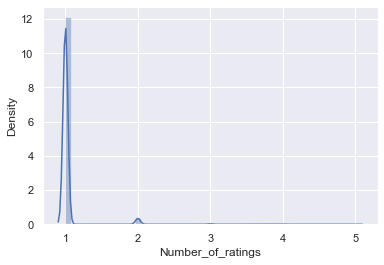

In [37]:
sns.distplot(ratings_data['Number_of_ratings'])
plt.show()

#### similar visualization for the actual rating assign to the movies

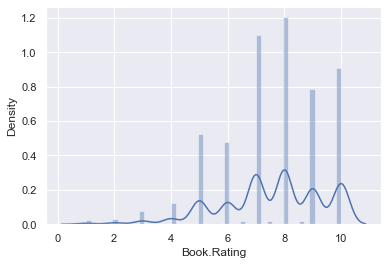

In [38]:
sns.distplot(ratings_data['Book.Rating'])
plt.show()

#### The Relationship Between Average Rating and Number of Ratings

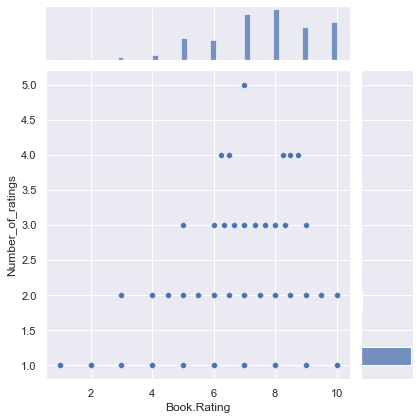

In [39]:
sns.jointplot(x = ratings_data['Book.Rating'], y = ratings_data['Number_of_ratings'])
plt.show()

# How to Build a Movie Recommendation System

In [40]:
# To demonstrate this, we'll select two movies from the data set:
ratings_matrix = data.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating')
Clara_Callan_user_ratings = ratings_matrix['Clara Callan']
stardust_user_ratings = ratings_matrix['stardust']

In [41]:
Clara_Callan_user_ratings.head(5)
# A value of NaN is stored if a specific user has not provided a rating

User.ID
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Clara Callan, dtype: float64

In [42]:
# calculate the correlation between the toy_story_user_ratings and star_wars_user_ratings data sets

In [43]:
ratings_matrix.corrwith(Clara_Callan_user_ratings)['Classical Mythology']

nan

In [44]:
# find a movie that _is _highly similar to the Classical Mythology Book.

In [45]:
correlation_with_Clara_Callan = pd.DataFrame(ratings_matrix.corrwith(Clara_Callan_user_ratings))

correlation_with_Clara_Callan.dropna().sort_values(0, ascending = False).head(15)

,0
Book.Title,


In [46]:
len(data['User.ID'].unique())

2182

In [47]:
len(data['Book.Title'].unique())

9659

In [48]:
new_data = data.groupby(['User.ID', 'Book.Title'])['Book.Rating'].sum().unstack().reset_index().fillna(0).set_index('User.ID')

In [49]:
new_data

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [50]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [51]:
user_sin = 1 - pairwise_distances(new_data.values, metric= 'cosine')

In [52]:
user_sin

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
user_sin.shape

(2182, 2182)

In [18]:
user_sin_df = pd.DataFrame(user_sin)

In [19]:
user_sin_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
user_sin_df.index = data['User.ID'].unique()
user_sin_df.columns = data['User.ID'].unique()

In [21]:
user_sin_df.iloc[0:10,0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
np.fill_diagonal(user_sin,0)
user_sin_df.iloc[-4:-1,1998:2000]

,161448,161453
162109,0.0,0.000000
162113,0.0,0.023464
162121,0.0,0.000000


In [35]:
user_sin_df.idxmax(axis = 1)[0:]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [45]:
data[(data['User.ID']==162113) | (data['User.ID']==161453)]

,User.ID,Book.Title,Book.Rating
8959,161453,"Bread, Tomato, Garlic: Quick Cooking With 3 Ma...",9
8960,161453,"The Ubiquitous Shrimp: From Simple to Exotic, ...",8
9989,162113,The Cape Ann (Contemporary American Fiction),8


In [46]:
x =data[(data['User.ID']==162113) | (data['User.ID']==161453)]

In [51]:
x['Book.Title'][8959]

'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients'

In [52]:
x['Book.Title'][8960]

"The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"

In [53]:
x['Book.Title'][9989]

'The Cape Ann (Contemporary American Fiction)'